# Assignment 02:

Questions based on the Inverse Transform Method and generating pseudo random sequences from given non uniform distributions was explored in this assignment.

In [2]:
# importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import math

# First we require a uniform random number generator. Following is the function for the same:
x_0 = 42
def uniform_generator(x_0):
    a = 1597
    b = 51749
    m = 244944
    x_0 = (a*x_0 + b)%m
    return x_0/m, x_0

# A seed function to produce reproducible results.
def seed (a):
    x_0 = a

## Problem 1
Given is the Probability Density Function (pdf). In order to generate a sampling sequence, we need to integrate this sequence first to find the Cumulative Distribution Function (cdf) and then find it's inverse in order to generate the sequence.

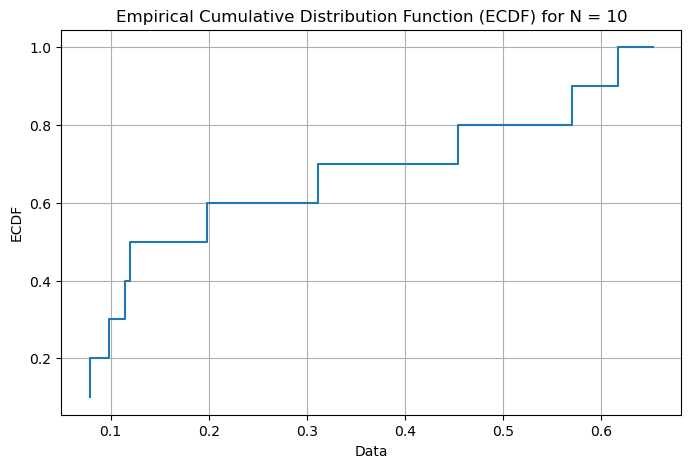

The mean is 0.3213459311445546, and the variance is 0.04836651727958348


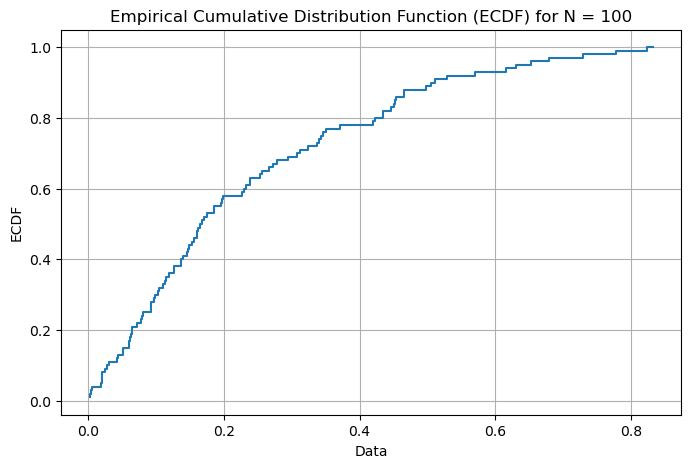

The mean is 0.24337009214346858, and the variance is 0.040946284375804554


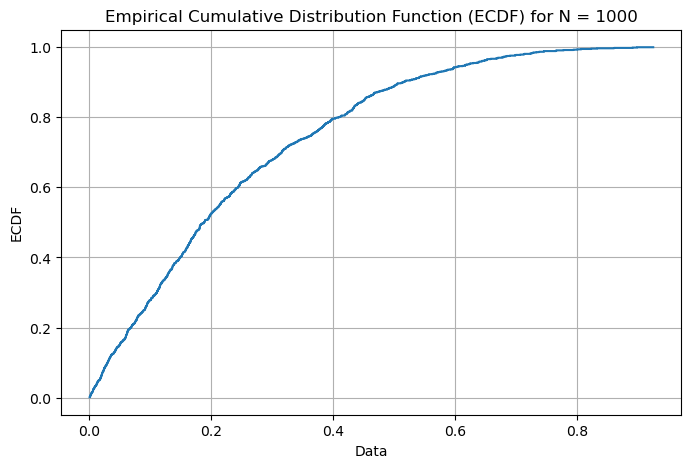

The mean is 0.24070658262423728, and the variance is 0.036307848150493656


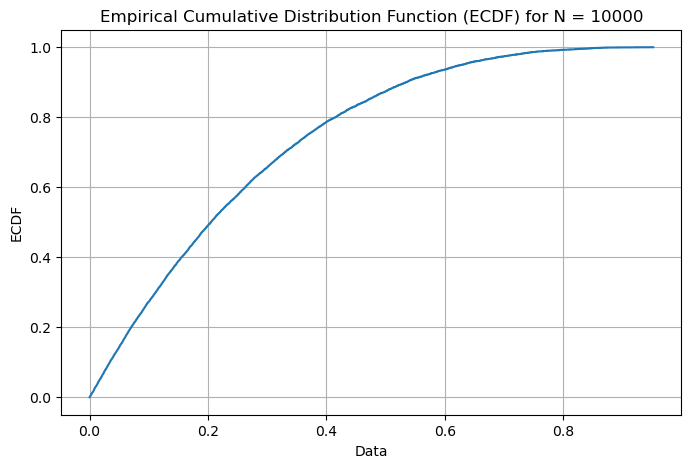

The mean is 0.2491728981540611, and the variance is 0.03728377465726722


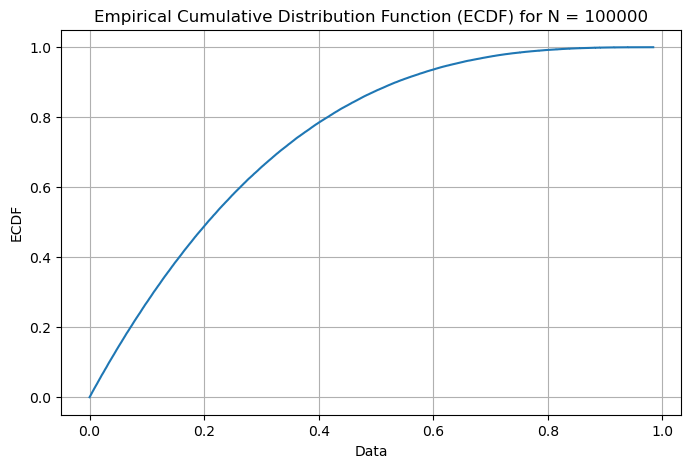

The mean is 0.24969668703283157, and the variance is 0.03739386985795466


In [4]:
# inverse of the cumulative distribution function is y = 1 - (1 - x)^1/3.
# Generating X1, X2, X3 ... XN for N = 10, 100, 1000, 10000, 100000.
N = [10, 100, 1000, 10000, 100000]
for i in N:
    x_0 = 42
    X = []
    for _ in range(i):
        x, x_0 = uniform_generator(x_0)
        X.append(1 - (1 - x)**(1/3)) # '1-x' uniform(0, 1) is the same as 'x' uniform(0, 1)
    X = np.sort(X)    
    # Creating the Y axis in order to plot the values
    Y = np.arange(1, len(X) + 1) / len(X)
    plt.figure(figsize=(8, 5))
    # Creating a step plot in order to plot the ECDF.
    plt.step(X, Y)
    plt.xlabel('Data')
    plt.ylabel('ECDF')
    plt.title(f'Empirical Cumulative Distribution Function (ECDF) for N = {i}')
    plt.grid(True)
    plt.show()    

    # Mean and Variance:
    mean = np.mean(X)
    var = np.var(X)

    print(f'The mean is {mean}, and the variance is {var}')

## Problem 2
Given a piecewise right continuous CDF. In order to generate a sampling from this distribution, we must first invert the CDF first and generate the distribution using a Uniform Distribution and the Inverse Transform Method.

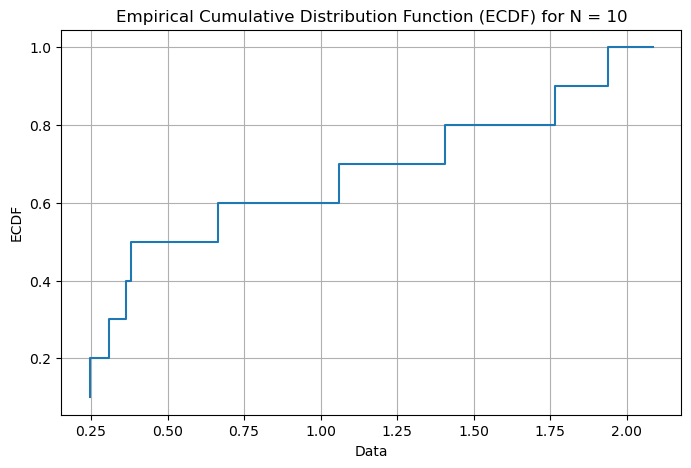

The mean is 1.0222004617545626, and the variance is 0.47537048943278776


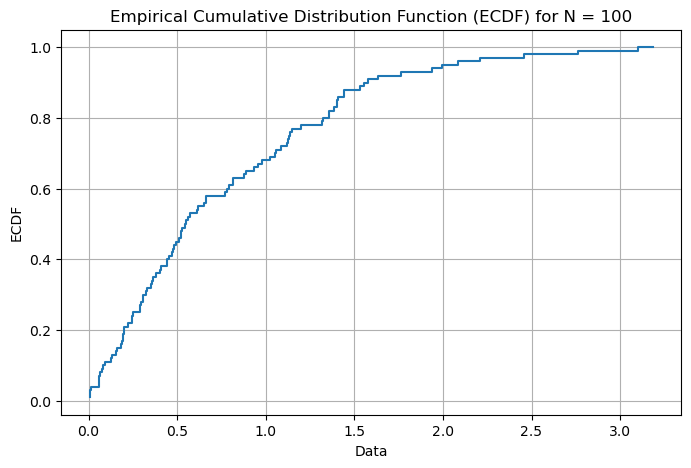

The mean is 0.7970695693944585, and the variance is 0.46774273226817004


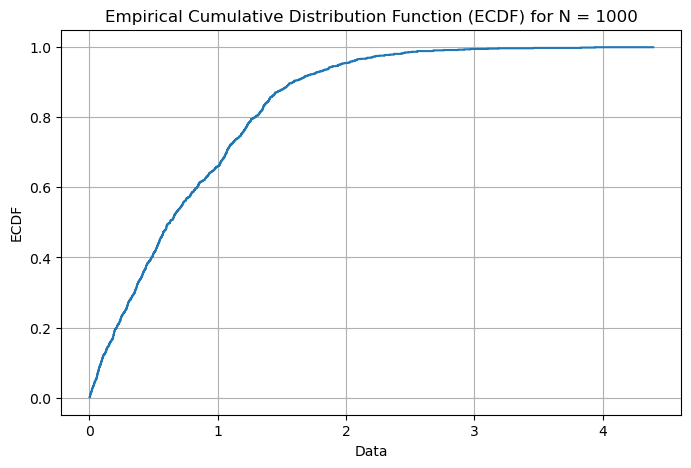

The mean is 0.7849098938725533, and the variance is 0.40217158570271005


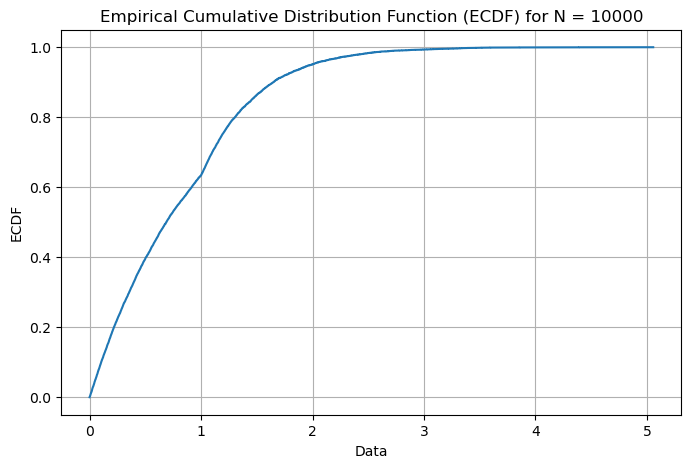

The mean is 0.8123436857727191, and the variance is 0.4070782131206539


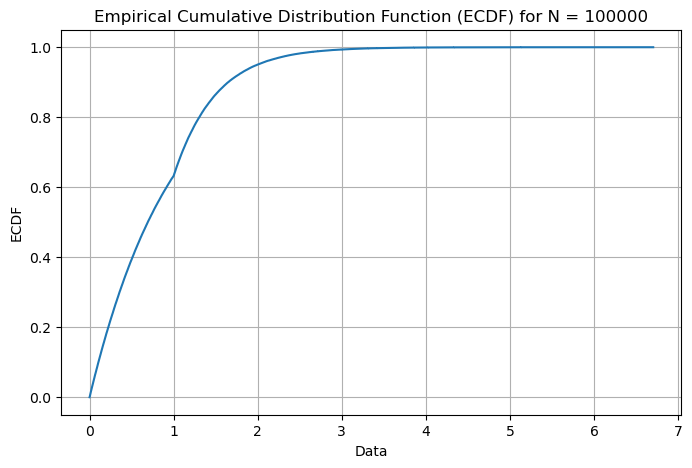

The mean is 0.8147889958063073, and the variance is 0.4117988238109873


In [6]:
# inverse of the given CDF is:
# y = -ln(1 - x); 0 <= x < 1 - 1/e.
# y = 1/2 - ln(1 - x)/2; 1 - 1/e < x <= 1.

# Generating X1, X2, X3 ... XN for N = 10, 100, 1000, 10000, 100000.
N = [10, 100, 1000, 10000, 100000]
e = math.e

for i in N:
    x_0 = 42
    X = []
    for _ in range(i):
        x, x_0 = uniform_generator(x_0)
        if(0 <= x and x < (1 - 1/e)):
            X.append(-1*math.log(1 - x))
        else:
            X.append(1/2 - (math.log(1 - x)/2))
    
    X = np.sort(X)    
    # Creating the Y axis in order to plot the values
    Y = np.arange(1, len(X) + 1) / len(X)
    plt.figure(figsize=(8, 5))
    # Creating a step plot in order to plot the ECDF.
    plt.step(X, Y)
    plt.xlabel('Data')
    plt.ylabel('ECDF')
    plt.title(f'Empirical Cumulative Distribution Function (ECDF) for N = {i}')
    plt.grid(True)
    plt.show()    

    # Mean and Variance:
    mean = np.mean(X)
    var = np.var(X)

    print(f'The mean is {mean}, and the variance is {var}')

## Problem 3
Generating the discrete uniform distribution on {1, 3, 5, 9, ... , 9999} and tabulating frequencies.

In [1]:
# We notice that for the given discrete uniform distribution, the probability of each outcome is 1/4999.
# Therefore if we use a technique similar to the look-up table, we can arrive at the following:
# Xi can be calculated as 2*ceil(U(0, 1)*499) - 1.
frequency = {}
x_0 = 42
for _ in range(100000):
    x, x_0 = uniform_generator(x_0)
    Xi = 2*math.ceil(x*4999) - 1
    if Xi in frequency:
        frequency[Xi] += 1
    else:
        frequency[Xi] = 1

# Converting the map to a list of values
X = list(frequency.keys())
Y = list(frequency.values())

## Printing the values obtained
# print(X)
# print(Y)


# Plotting the values.
plt.figure(figsize=(12, 6))
plt.bar(X, Y, width=2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Values from Discrete Uniform Distribution')
plt.show()

NameError: name 'uniform_generator' is not defined

# end